In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

C:\Users\sanjay\AppData\Local\Temp\ipykernel_2200\3112993521.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:,0], X[:,1], s=50, cmap = 'rainbow')


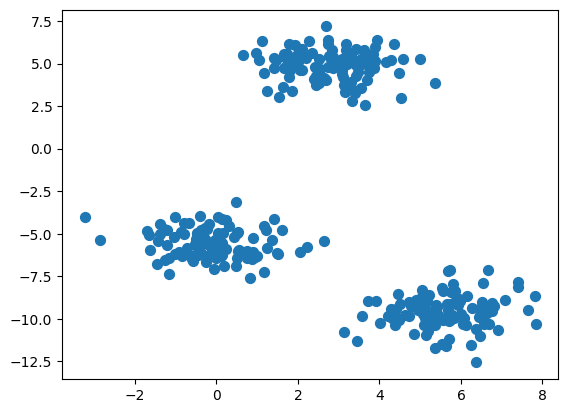

In [65]:
# parameters
n_sample = 300
n_features = 2
centers = 3

# generate data

X,y = make_blobs(n_samples=n_sample, n_features=n_features, centers=centers, cluster_std=1, random_state=10)

# visualize data
plt.scatter(X[:,0], X[:,1], s=50, cmap = 'rainbow')
plt.show()

In [69]:
import random
class KMeans_clustring:
    
    def __init__(self, n_clusters=2,max_iteration=100):
        self.n_cluster = n_clusters
        self.max_iteration = max_iteration
        self.centroids = None

    def fit_predict(self, X):
        random_index = random.sample(range(0,X.shape[0]), k=self.n_cluster)
        self.centroids = X[random_index]

        for i in range(self.max_iteration):
            # assign cluster
            cluster_group = self.assign_cluster(X=X)
            old_centroid = self.centroids

            # move centroids
            self.centroids = self.move_centroids(X,cluster_group)
             
            # check finish
            if (old_centroid == self.centroids).all():
                break
        
        return cluster_group
    def assign_cluster(self, X):
        cluster_group = []
        distances = []

        for row in X:
            for centroid in self.centroids:
                distances.append(np.sqrt(np.dot(row - centroid, row-centroid)))
            min_distance = min(distances)
            index_pos = distances.index(min_distance)
            cluster_group.append(index_pos)
            distances.clear()  

        return np.array(cluster_group)      

    def move_centroids(self, X, cluster_group):
        new_centroid = []

        cluster_type = np.unique(cluster_group)

        for type in cluster_type:
            new_centroid.append(X[cluster_group == type].mean(axis=0))

        return np.array(new_centroid)    

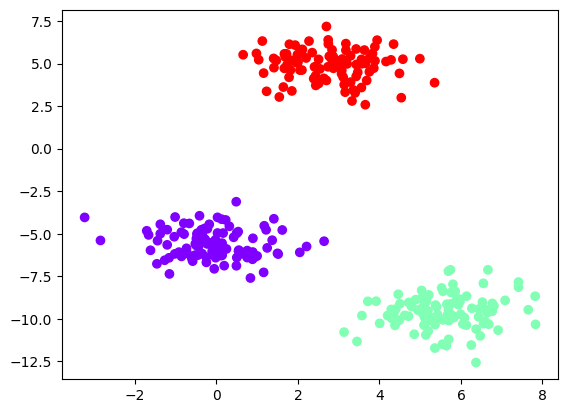

In [71]:
k = KMeans_clustring(n_clusters=3)
y_mean = k.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=y_mean, cmap = 'rainbow')
plt.show()